In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("sales_data_sample.csv")

In [6]:
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2/24/2003 0:00,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,5/7/2003 0:00,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,7/1/2003 0:00,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,8/25/2003 0:00,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,10/10/2003 0:00,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,12/2/2004 0:00,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,1/31/2005 0:00,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,3/1/2005 0:00,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,3/28/2005 0:00,Shipped,France,Small,0.20,22.6782


In [6]:
#hãy cho biết thứ tự mức độ ổn định tăng dần của giá trị bán hàng trên từng nhóm kích thước đặt hàng
#Tính phương sai
var_DealSize = df.groupby('DEALSIZE')['SALES'].var()
var_DealSize.sort_values()
#=> Small - Large - Medium


DEALSIZE
Small     3.331406e+05
Medium    1.096398e+06
Large     1.676351e+06
Name: SALES, dtype: float64

In [30]:
df.groupby('COUNTRY').count()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,DEALSIZE,Discount,Profit
COUNTRY,,,,,,,,,
Australia,185,185,185,185,185,185,185,185,185
Austria,55,55,55,55,55,55,55,55,55
Belgium,33,33,33,33,33,33,33,33,33
Canada,70,70,70,70,70,70,70,70,70
Denmark,63,63,63,63,63,63,63,63,63
Finland,92,92,92,92,92,92,92,92,92
France,314,314,314,314,314,314,314,314,314
Germany,62,62,62,62,62,62,62,62,62
Ireland,16,16,16,16,16,16,16,16,16


In [10]:
# dựa vào mô hình hồi quy tuyến tính để phân tích sự ảnh hưởng của số lượng mua hàng, giá trị bán hàng và giảm giá tác động như thế nào đến 
# lợi nhuận . hãy dự báo giá trị lợi nhuận khi biết lần lượt tương ứng các độc lập là 50,2000,0.01
import statsmodels.api as sm
x_with_constant = sm.add_constant(df[['QUANTITYORDERED','SALES','Discount']].values)
y = df[['Profit']].values
result = sm.OLS(y,x_with_constant).fit()
print(result.summary())
# lợi nhận = 54.7781 + 0.3367*QUANTITYORDERED -0.0013*SALES -238.6262 *Discount
#          = 54.7781 + 0.3367*50 -0.0013*2000 -238.6262 *0.01 =  66,626838

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     64.21
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           3.74e-40
Time:                        10:33:17   Log-Likelihood:                -18760.
No. Observations:                2823   AIC:                         3.753e+04
Df Residuals:                    2819   BIC:                         3.755e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7781     13.377      4.095      0.0

In [55]:
import numpy as np
# hãy cho biết độ lệch của giá trị đặt hàng của các sản phẩm
#std_Sales = df['SALES'].max()-df['SALES'].min()
#std_Sales = df['SALES'].var()
#std_Sales = df['SALES'].std()
#std_Sales = df['SALES'].quantile(0.75) -df['SALES'].quantile(0.25)
#std_Sales = np.mean(np.abs(df['SALES'] - np.mean(df['SALES'])))  
std_Sales =  df['SALES'].std()/df['SALES'].mean()

std_Sales


np.float64(0.5182674721894585)

In [61]:
#hãy giá trị lệch của Sales sau khi tranform qua hàm f(x) = 1/(log(x)^2+1)
import numpy as np
def funcX(x):
    return 1/(np.log(x)**2 + 1)

df['TransformX'] = funcX(df[["SALES"]])

# giá trị lệch

Sales =   df['TransformX'].max()-df['TransformX'].min()
Sales

np.float64(0.014689921893679285)

In [63]:
#hãy cho biết trong đơn hàng số lượng dòng đặt hàng nhiều nhất là bao nhiêu
order_lines_count = df.groupby('ORDERNUMBER').size()
order_lines_count.max()


np.int64(18)

In [25]:
std_sales_by_order = df.groupby('ORDERNUMBER')['SALES']
std_sales_by_order.std()/std_sales_by_order.mean()

ORDERNUMBER
10100    0.528026
10101    0.401686
10102    0.567117
10103    0.365631
10104    0.415318
           ...   
10421    0.702214
10422    0.820830
10423    0.292102
10424    0.670052
10425    0.544369
Name: SALES, Length: 307, dtype: float64

In [20]:
max_quantity = df['QUANTITYORDERED'].max()
max_order = df[df['QUANTITYORDERED'] == max_quantity]['ORDERNUMBER'].values
max_order

array([10405])

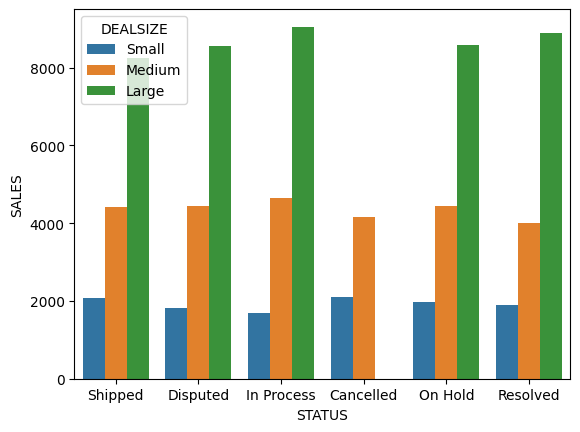

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#vẽ biểu đồ cho biết trung bình doanh số ở trạng thái giao hàng

# Vẽ biểu đồ

sns.barplot(x='STATUS', y='SALES', hue='DEALSIZE',data = df,errorbar=None)

plt.show()

In [74]:
#hãy cho biết tương quan mẫu của QUANTITYORDERED và SALES
df[['QUANTITYORDERED','SALES']].corr()
# > 0 => tương quan thuận, [0.5-0.65]tương quan khá

,QUANTITYORDERED,SALES
QUANTITYORDERED,1.000000,0.551426
SALES,0.551426,1.000000


In [77]:
#có mối liên hệ nào giữa trạng thái giao hàng và giá trị đặt hàng hay không
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('SALES ~ STATUS', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
# 0.003 < 0.05 => có phụ thuộc

,df,sum_sq,mean_sq,F,PR(>F)
STATUS,5.0,5.921801e+07,1.184360e+07,3.506652,0.003661
Residual,2817.0,9.514324e+09,3.377467e+06,NaN,NaN


In [11]:
#hãy cho biết giá trị của SALES sau khi dung chuẩn hóa Z-score scater là 0.25 , hỏi giá trị trước chuẩn hóa là bao nhiêu

meam_sales = df['SALES'].mean()
std_sales = df['SALES'].std()
z_score = 0.25

In [13]:
z_score * std_sales + meam_sales

np.float64(4014.3553483443616)

In [15]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(df[['DEALSIZE']]).toarray()
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [16]:
total_quantity_by_size= df.groupby('DEALSIZE')['QUANTITYORDERED'].sum()
total_quantity = total_quantity_by_size.sum()
(total_quantity_by_size / total_quantity) * 100


DEALSIZE
Large      7.483824
Medium    53.013617
Small     39.502559
Name: QUANTITYORDERED, dtype: float64